## GA-8 (Part-A)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report

In [ ]:
X_w,y_w=load_wine(return_X_y=True)
type(X_w)

numpy.ndarray

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_w,y_w, test_size=0.3, random_state = 1)
dtc= DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=2, max_depth=3, random_state=1)
param_grid = {'criterion':['entropy','gini'], 'splitter': ['random','best'], 'min_samples_leaf':[2,4,6,8,10], 'max_depth': [3,4,5,6]}
gscv = GridSearchCV(dtc, param_grid=param_grid, cv=4)

In [ ]:
gscv.fit(X_train,y_train)
gscv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)

In [ ]:
y_pred = gscv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.85      0.89      0.87        19
           2       0.92      0.92      0.92        12

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
print(gscv.best_estimator_)
print(gscv.best_index_)
print(gscv.best_params_)
print(gscv.best_score_)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)
51
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'splitter': 'best'}
0.9274193548387097


In [ ]:
diab = load_diabetes()
X_train2,X_test2,y_train2,y_test2 = train_test_split(diab.data, diab.target, test_size=0.3, random_state=1)
dtr = DecisionTreeRegressor(random_state=1, criterion='squared_error', splitter='random', max_leaf_nodes=10)
dtr.fit(X_train2,y_train2)
y_pred2 = dtr.predict(X_test2)

In [ ]:
print(dtr.score(X_train2,y_train2))
print(dtr.score(X_test2,y_test2))

0.5032060624566737
0.218771375137222


<function matplotlib.pyplot.show(close=None, block=None)>

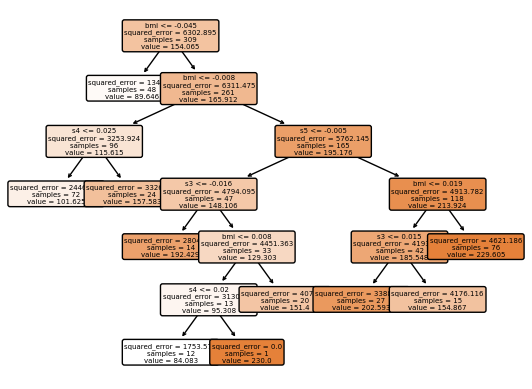

In [ ]:
plot_tree(dtr,feature_names=diab.feature_names, rounded=True, filled=True, fontsize=5)
plt.show

In [ ]:
diabn= load_diabetes()
X_train3,X_test3,y_train3,y_test3 = train_test_split(diabn.data, diabn.target, test_size=0.3, random_state=1)
dtr3 = DecisionTreeRegressor(max_depth = 4, random_state = 1)
param_grid3 = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter':['random','best'],
        'max_features': ['auto','sqrt', 'log2'],
        'ccp_alpha': [0.001,0.01,0.02,0.05]}
gscv3 = GridSearchCV(dtr3, param_grid=param_grid3, cv=4)
gscv3.fit(X_train3, y_train3)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']})

In [ ]:
gscv3.score(X_test3,y_test3)

0.1223013699342489

In [ ]:
gscv3.best_params_

{'ccp_alpha': 0.05,
 'criterion': 'poisson',
 'max_features': 'auto',
 'splitter': 'best'}